# Bangalore Home Recommendation ShopAssist AI


#### Project Background
Home Recommendation Chatbot Project
Welcome to our Home Recommendation Chatbot, your personalized assistant for finding the perfect home! This innovative tool leverages advanced algorithms to help home searchers find properties that best match their preferences. Whether you are looking for a cozy apartment or a spacious flat, our chatbot is designed to streamline your search process and provide tailored recommendations based on your specific requirements.

Key Features:
•	Personalized Recommendations: Input your desired number of bedrooms, balconies, flat size, and budget to receive a curated list of homes that meet your criteria.
•	User-Friendly Interface: Our chatbot is easy to use, making your home search experience seamless and enjoyable.
•	Comprehensive Database: Access a wide range of property listings to find the best match for your needs.
•	Efficient and Fast: Get instant recommendations, saving you time and effort in your home search journey.


In today's digital age, online shopping has become the go-to option for many consumers. However, the overwhelming number of choices and the lack of personalized assistance can make the shopping experience daunting. To address this, we have developed **ShopAssist AI, a chatbot that combines the power of large language models and rule-based functions to ensure accurate and reliable information delivery**.


#### Problem Statement

*Given a dataset containing information about Homes (size, Bedrooms,Balconies price, descriptions, etc.), build a chatbot that parses the dataset and provides accurate Home recommendations based on user requirements*.


You can load the data and see it here.

In [67]:
# Install OpenAI library
!pip install -U -q openai tenacity

In [68]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [69]:
import os
os.chdir('/content/drive/MyDrive/ShopAIAssist')
!ls

Bangalore_house_data_2.csv  Bangalore_house_dataOLD.csv  OPENAI_API_Key2.txt  updated_house.csv
Bangalore_house_data.csv    laptop_data.csv		 updated_house2.csv   updated_laptop.csv


In [70]:
# Import the libraries
import pandas as pd
from IPython.display import display, HTML
# Set the display width to control the output width
pd.set_option('display.width', 100)
# Read the dataset and read the home Dataset
df = pd.read_csv('Bangalore_house_data_2.csv')
df

area_type   availability                  location       size  society total_sqft  \
0    Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK  Coomee        1056   
1              Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom  Theanmp       2600   
2          Built-up  Area  Ready To Move               Uttarahalli      3 BHK      NaN       1440   
3    Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK  Soiewre       1521   
4    Super built-up  Area  Ready To Move                  Kothanur      2 BHK      NaN       1200   
..                    ...            ...                       ...        ...      ...        ...   
494  Super built-up  Area         18-Apr           Electronic City      2 BHK  Prarkun       1128   
495  Super built-up  Area  Ready To Move               Omkar Nagar      2 BHK  Shinei        1000   
496  Super built-up  Area  Ready To Move                 Yelahanka      2 BHK  Apows M       1035   
497        Built-up  Area  Ready To Move          Kereguddadahalli      2 BHK      NaN        950   
498  Super built-up  Area  Ready To Move             Bisuvanahalli      3 BHK  Prityel       1075   

     bath  balcony  price 2                                      Description 2  \
0     2.0      1.0    39.07  Super built-up  Area 45645 Electronic City Pha...   
1     5.0      3.0   120.00  Plot  Area Ready To Move Chikka Tirupathi 4 Be...   
2     2.0      3.0    62.00  Built-up  Area Ready To Move Uttarahalli 3 BHK...   
3     3.0      1.0    95.00  Super built-up  Area Ready To Move Lingadheera...   
4     2.0      1.0    51.00  Super built-up  Area Ready To Move Kothanur 2 ...   
..    ...      ...      ...                                                ...   
494   2.0      1.0    63.00  Super built-up  Area 45400 Electronic City 2 B...   
495   2.0      1.0    53.00  Super built-up  Area Ready To Move Omkar Nagar...   
496   2.0      1.0    45.00  Super built-up  Area Ready To Move Yelahanka 2...   
497   2.0      1.0    32.00  Built-up  Area Ready To Move Kereguddadahalli ...   
498   2.0      1.0    36.00  Super built-up  Area Ready To Move Bisuvanahal...   

                                           Description     price  
0    Super built-up  Area 45645 Electronic City Pha...   3900000  
1    Plot  Area Ready To Move Chikka Tirupathi 4 Be...  12000000  
2    Built-up  Area Ready To Move Uttarahalli 3 BHK...   6200000  
3    Super built-up  Area Ready To Move Lingadheera...   9500000  
4    Super built-up  Area Ready To Move Kothanur 2 ...   5100000  
..                                                 ...       ...  
494  Super built-up  Area 45400 Electronic City 2 B...   6300000  
495  Super built-up  Area Ready To Move Omkar Nagar...   5300000  
496  Super built-up  Area Ready To Move Yelahanka 2...   4500000  
497  Built-up  Area Ready To Move Kereguddadahalli ...   3200000  
498  Super built-up  Area Ready To Move Bisuvanahal...   3600000  

[499 rows x 12 columns]

#### Approach:

How It Works:
1.	**Specify Your Preferences**: Start by providing details about the number of bedrooms and balconies you desire, the size of the flat, and your price range.
2.	**Receive Tailored Suggestions**: Our chatbot will process your inputs and generate a list of homes that fit your criteria.
3.	**Explore Your Options**: Review the suggested properties and choose the one that best suits your lifestyle and budget.

## Part 2: System Design


#### Dataset

We have a dataset `bangalore home.csv` where  each row describes the features of a single home and also has a small description at the end. The chatbot that we build will leverage LLMs to parse this `Description` column and provide recommendations

The chatbot should ask a series of questions to
- Determine the user's requirments. For simplicity, we have used 6 features to encapsulate the user's needs. The 5 features are as follows:
    - Size
    - Total Sqft
    - Number of Bedrooms
    - Number of Balconies
    - Price

- Confirm if the user's requirements have been correctly captured at the end.

After that the chatbot lists down the top 3 homes that are the most relevant, and engages in further conversation to help the user find the best one.


#### Building the Chatbot

Now let's go ahead and understand the system design for the chatbot.

![Chatbot_sys_design.png](https://drive.google.com/uc?id=1j-mw_dNcbxGcelQ0PmkDB0nKOpauU1wX)

|`Stage 1`

- Intent Clarity Layer
- Intent Confirmation Layer

`Stage 2`

- Product Mapping Layer
- Product Information Extraction Layer

`Stage 3`

- Product Recommendation Layer

##### Major functions behind the Chatbot

Let's now look at a brief overview of the major functions that form the chatbot. We'll take a deep dive later



- `initialize_conversation()`: This initializes the variable conversation with the system message.
- `get_chat_completions()`: This takes the ongoing conversation as the input and returns the response by the assistant
- `moderation_check()`: This checks if the user's or the assistant's message is inappropriate. If any of these is inappropriate, it ends the conversation.
- `intent_confirmation_layer()`: This function takes the assistant's response and evaluates if the chatbot has captured the user's profile clearly. Specifically, this checks if the following properties for the user has been captured or not  - Size , Total Sqft , Bedrooms , Balconies , Price
- `dictionary_present()`: This function checks if the final understanding of user's profile is returned by the chatbot as a python dictionary or not. If there is a dictionary, it extracts the information as a Python dictionary.
- `compare_homes_with_user()`: This function compares the user's profile with the different Homes and come back with the top 3 recommendations.
- `initialize_conv_reco()`: Initializes the recommendations conversation

In the next sections, we will look at how to write the code for the above functions.

## Part 3: Implementation

## Stage 1

[Stage 1 Flowchart](https://cdn.upgrad.com/uploads/production/ed8cf454-0c7c-4c5d-bc05-23bb3cea6c57/image+3.jpg)

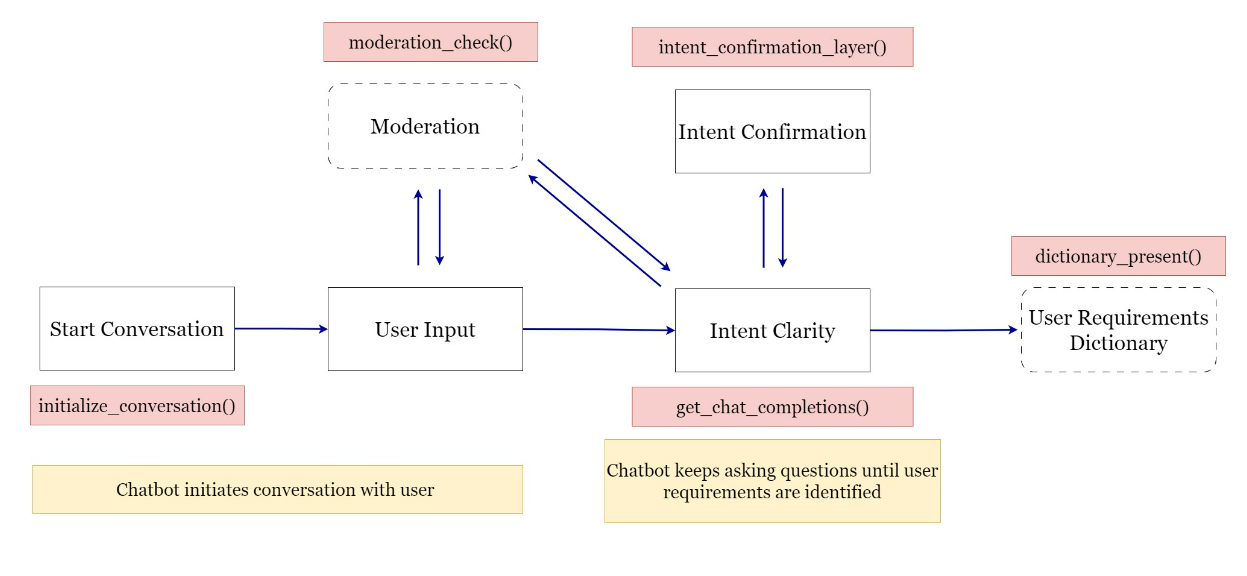
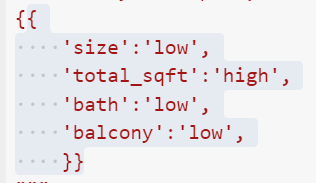

### 3.1 - Import the libraries

Let's start by importing the libraries that we'll require for this project. Following are the ones:
- openai
- pandas
- os, json, ast

Make sure the api key is stored in the text file `OPENAI_API_Key.txt`.

In [71]:
# Import the libraries
import os, json, ast
import openai
from tenacity import retry, wait_random_exponential, stop_after_attempt

In [72]:
# Read the OpenAI API key
#openai.api_key = open("OPENAI_API_Key.txt", "r").read().strip()
openai.api_key = "sk-proj-kYHSw3X44q7W6eADivrfT3BlbkFJ6UP25hyjHMFqVNZ0W9ov"
os.environ['OPENAI_API_KEY'] = openai.api_key

### 3.2 - Implementing Intent Clarity and Intent Confirmation Layers

Let's start with the first part of the implementation - building the `intent clarity` and `intent confirmation` layers. As mentioned earlier, this layer helps in identifying the user requirements and passing it on to the product matching layer. Here are the functions that we would be using for building these layers:

- `initialize_conversation()`


### `initialize_conversation()`:
This initializes the variable conversation with the system message. Using prompt engineering and chain of thought reasoning, the function will enable the chatbot to keep asking questions until the user requirements have been captured in a dictionary. It also includes Few Shot Prompting(sample conversation between the user and assistant) to align the model about user and assistant responses at each step.



```
def initialize_conversation():
    '''
    Initializes a conversation for an intelligent home gadget expert system.

    Returns:
        list: [{"role": "system", "content": system_message}]
        A list containing a dictionary representing the system's initial message.
        
    The function initializes a conversation with the user, providing instructions, examples,
    and a sample conversation to guide the user in interacting with the system. The system's
    initial message includes information about the purpose of the conversation, instructions
    for filling in user profile details, guidelines for asking questions, and a sample
    conversation demonstrating how the interaction with the system progresses.

    The system expects the user to provide information related to their home requirements,
    including GPU intensity, display quality, portability, multitasking needs, processing
    speed, and budget. The provided information is used to update a predefined dictionary
    representing the user's profile. The system emphasizes extracting specific details from
    the user's responses to accurately fill in the dictionary values.

    The conversation flow involves three main thoughts:
    - Thought 1: Understanding the user's profile and filling confident values.
    - Thought 2: Filling values for remaining keys based on gathered information.
    - Thought 3: Confirming and verifying updated dictionary values.

    Users are encouraged to engage in a meaningful conversation with the system to ensure
    accurate profile representation and tailored recommendations for the best home choice.

    Usage:
        # Initialise the conversation
        conversation = initialize_conversation()
        # Print the conversation
        print(conversation)
    '''
    ```



In [73]:
def initialize_conversation():
    '''
    Returns a list [{"role": "system", "content": system_message}]
    '''

    delimiter = "####"

    example_user_dict = {'size':"2 BHK",
                        'total_sqft': "1056",
                        'bath': "2.0",
                        'balcony': "1.0",
                        'price': "3900000"}

    example_user_req = {'size': "_",
                        'total_sqft': "_",
                        'bath': "_",
                        'balcony': "_",
                        'price': "_"}

    system_message = f"""
    You are an intelligent House recommendation expert for Bengaluru area and your goal is to find the best house for a user.
    You need to ask relevant questions and understand the user profile by analysing the user's responses.
    You final objective is to fill the values for the different keys ('size','total_sqft','bath','balcony','price') in the python dictionary and be confident of the values.
    These key value pairs define the user's profile.
    The python dictionary looks like this
    {{'size': 'values','total_sqft': 'values','bath': 'values','balcony': 'values','price': 'values'}}
    The value for 'price' should be a numerical value extracted from the user's response.
    The values for all keys, except 'price', should be 'low', 'medium', or 'high' based on the importance of the corresponding keys, as stated by user.
    All the values in the example dictionary are only representative values.
    {delimiter}
    Here are some instructions around the values for the different keys. If you do not follow this, you'll be heavily penalised:
    - The values for all keys, except 'price', should strictly be either 'low', 'medium', or 'high' based on the importance of the corresponding keys, as stated by user.
    - The value for 'price' should be a numerical value extracted from the user's response.
    - 'price' value needs to be greater than or equal to 20 Lakh INR. The value of 'price' mentioned in datasheet is in Lakhs. If the user says less than that, please mention that there are no houses in that range.
    - Do not randomly assign values to any of the keys.
    - The values need to be inferred from the user's response.
    {delimiter}

    To fill the dictionary, you need to have the following chain of thoughts:
    Follow the chain-of-thoughts below and only output the final updated python dictionary for the keys as described in {example_user_req}. \n
    {delimiter}
    Thought 1: Ask a question to understand the user's profile and requirements. \n
    If their primary use for the house is unclear. Ask followup questions to understand their needs.
    You are trying to fill the values of all the keys {{'size','total_sqft','bath','balcony','price'}} in the python dictionary by understanding the user requirements.
    Identify the keys for which you can fill the values confidently using the understanding. \n
    Remember the instructions around the values for the different keys.
    If the necessary information has been extracted, only then proceed to the next step. \n
    Otherwise, rephrase the question to capture their profile clearly. \n

    {delimiter}
    Thought 2: Now, you are trying to fill the values for the rest of the keys which you couldn't in the previous step.
    Remember the instructions around the values for the different keys.
    Ask questions you might have for all the keys to strengthen your understanding of the user's profile.
    If yes, move to the next Thought. If no, ask question on the keys whose values you are unsure of. \n
    It is a good practice to ask question with a sound logic as opposed to directly citing the key you want to understand value for.
    {delimiter}

    {delimiter}
    Thought 3: Check if you have correctly updated the values for the different keys in the python dictionary.
    If you are not confident about any of the values, ask clarifying questions.
    {delimiter}

    {delimiter}
    Here is a sample conversation between the user and assistant:
    User: "Hi, I am searching for a house for my family of 4."
    Assistant: "Great! , you likely require a bigger house for 4 members. Hence, the house should have more bedrooms and bath. May I know what kind of work do you do? Are you more working from home or need to travel to office.if you are working from home you may need a seperate study room"
    User: "Yes, sometimes I work from home as well so I may need a 3 BHK"
    Assistant: "Thank you for the information. will your family need more than 1 Bath?"
    User: "Yes, I will need more than 1 bath"
    Assistant: "Thank you for the information. will your family need a balcony?"
    User: "Yes, I will need a balcony"
    Assistant:"Could you kindly let me know your price that you are for house? This will help me find options that fit within your price range while meeting the specified requirements."
    User: "my max budget is 40 lakh inr"
    Assistant: "{example_user_dict}"
    {delimiter}

    Start with a short welcome message and encourage the user to share their requirements.
    """
    conversation = [{"role": "system", "content": system_message}]
    # conversation = system_message
    return conversation

Let's see what does `initialize_conversation()` does.

<br>

We have added a prefix `debug_` to each of the variables so that we can play around with the inputs and outputs and it doesn't disturb the main function.

In [74]:
debug_conversation = initialize_conversation()
print(debug_conversation)

[{'role': 'system', 'content': '\n    You are an intelligent House recommendation expert for Bengaluru area and your goal is to find the best house for a user.\n    You need to ask relevant questions and understand the user profile by analysing the user\'s responses.\n    You final objective is to fill the values for the different keys (\'size\',\'total_sqft\',\'bath\',\'balcony\',\'price\') in the python dictionary and be confident of the values.\n    These key value pairs define the user\'s profile.\n    The python dictionary looks like this\n    {\'size\': \'values\',\'total_sqft\': \'values\',\'bath\': \'values\',\'balcony\': \'values\',\'price\': \'values\'}\n    The value for \'price\' should be a numerical value extracted from the user\'s response.\n    The values for all keys, except \'price\', should be \'low\', \'medium\', or \'high\' based on the importance of the corresponding keys, as stated by user.\n    All the values in the example dictionary are only representative val

In [75]:
# Let's look at the content in the debug_conversation key
print(debug_conversation[0]['content'])


    You are an intelligent House recommendation expert for Bengaluru area and your goal is to find the best house for a user.
    You need to ask relevant questions and understand the user profile by analysing the user's responses.
    You final objective is to fill the values for the different keys ('size','total_sqft','bath','balcony','price') in the python dictionary and be confident of the values.
    These key value pairs define the user's profile.
    The python dictionary looks like this
    {'size': 'values','total_sqft': 'values','bath': 'values','balcony': 'values','price': 'values'}
    The value for 'price' should be a numerical value extracted from the user's response.
    The values for all keys, except 'price', should be 'low', 'medium', or 'high' based on the importance of the corresponding keys, as stated by user.
    All the values in the example dictionary are only representative values.
    ####
    Here are some instructions around the values for the different key

In [76]:
# Let's initialise conversation
system_message = initialize_conversation()
print(system_message[0]["content"])


    You are an intelligent House recommendation expert for Bengaluru area and your goal is to find the best house for a user.
    You need to ask relevant questions and understand the user profile by analysing the user's responses.
    You final objective is to fill the values for the different keys ('size','total_sqft','bath','balcony','price') in the python dictionary and be confident of the values.
    These key value pairs define the user's profile.
    The python dictionary looks like this
    {'size': 'values','total_sqft': 'values','bath': 'values','balcony': 'values','price': 'values'}
    The value for 'price' should be a numerical value extracted from the user's response.
    The values for all keys, except 'price', should be 'low', 'medium', or 'high' based on the importance of the corresponding keys, as stated by user.
    All the values in the example dictionary are only representative values.
    ####
    Here are some instructions around the values for the different key

Let's now look at the next function.
- `get_chat_completions()`: This takes the ongoing conversation as the input and returns the response by the assistant. We'll use the Chat Completions function for performing LLM calls to OpenAI.

### `get_chat_completions()`:

This function perform LLM call using the Chat Completions API to get the LLM response.

In [77]:
# Define a Chat Completions API call
# Retry up to 6 times with exponential backoff, starting at 1 second and maxing out at 20 seconds delay
@retry(wait=wait_random_exponential(min=1, max=20), stop=stop_after_attempt(6))
def get_chat_completions(input, json_format = False):
    MODEL = 'gpt-3.5-turbo'

    system_message_json_output = """<<. Return output in JSON format to the key output.>>"""

    # If the output is required to be in JSON format
    if json_format == True:
        # Append the input prompt to include JSON response as specified by OpenAI
        input[0]['content'] += system_message_json_output

        # JSON return type specified
        chat_completion_json = openai.chat.completions.create(
            model = MODEL,
            messages = input,
            response_format = { "type": "json_object"},
            seed = 1234)

        output = json.loads(chat_completion_json.choices[0].message.content)

    # No JSON return type specified
    else:
        chat_completion = openai.chat.completions.create(
            model = MODEL,
            messages = input,
            seed = 2345)

        output = chat_completion.choices[0].message.content

    return output

### iterate_response() - Helper Function:
We've created a small helper test function to ensure the model's response is consistent.
Uncomment the code blocks and run the function `iterate_response(response)` to check if the response of the `intent_confirmation_layer`is consistent.}

In [78]:
def iterate_llm_response(funct, debug_response, num = 10):
    """
    Calls a specified function repeatedly and prints the results.
    This function is designed to test the consistency of a response from a given function.
    It calls the function multiple times (default is 10) and prints out the iteration count,
    the function's response(s).
    Args:
        funct (function): The function to be tested. This function should accept a single argument
                          and return the response value(s).
        debug_response (dict): The input argument to be passed to 'funct' on each call.
        num (int, optional): The number of times 'funct' will be called. Defaults to 10.
    Returns:
        This function only returns the results to the console.
    """
    i = 0  # Initialize counter

    while i < num:  # Loop to call the function 'num' times

        response = funct(debug_response)  # Call the function with the debug response

        # Print the iteration number, result, and reason from the response
        print("Iteration: {0}".format(i))
        print(response)
        print('-' * 50)  # Print a separator line for readability
        i += 1  # Increment the counter

# Example usage: test the consistency of responses from 'intent_confirmation_layer'
# iterate_llm_response(get_chat_completions, messages)

Let's pass the initialized conversation `debug_conversation` and see what is the assistant's response.

In [79]:
debug_user_input = "Hi, I am Anand. I need a 2bhk house in bangalore."

In [80]:
debug_conversation.append({"role": "user", "content": debug_user_input})
print(debug_conversation[1]["content"]) # User Input

Hi, I am Anand. I need a 2bhk house in bangalore.


In [81]:
# Let's look at the debug_conversation list
display(debug_conversation)

[{'role': 'system',
  'content': '\n    You are an intelligent House recommendation expert for Bengaluru area and your goal is to find the best house for a user.\n    You need to ask relevant questions and understand the user profile by analysing the user\'s responses.\n    You final objective is to fill the values for the different keys (\'size\',\'total_sqft\',\'bath\',\'balcony\',\'price\') in the python dictionary and be confident of the values.\n    These key value pairs define the user\'s profile.\n    The python dictionary looks like this\n    {\'size\': \'values\',\'total_sqft\': \'values\',\'bath\': \'values\',\'balcony\': \'values\',\'price\': \'values\'}\n    The value for \'price\' should be a numerical value extracted from the user\'s response.\n    The values for all keys, except \'price\', should be \'low\', \'medium\', or \'high\' based on the importance of the corresponding keys, as stated by user.\n    All the values in the example dictionary are only representative v

In [82]:
# Getting the response from the Assistant by passing the conversation to the Chat Completions API
debug_response_assistant = get_chat_completions(debug_conversation)
display(debug_response_assistant)

'Hi Anand, nice to meet you! A 2 BHK house sounds like a great choice. To assist you better, could you please let me know what is the most important factor for you when looking for a house in Bangalore? Is it the size of the house, the number of bathrooms, the presence of a balcony, or the price range you have in mind? This will help me understand your requirements better.'

Let's play around a bit and add the following user's input `debug_user_input` to the conversation `debug_conversation` and see what the assistant responds with.

In [83]:
# Let's append this to the conversation list
debug_conversation.append(({"role": "system", "content": debug_response_assistant}))
debug_conversation

[{'role': 'system',
  'content': '\n    You are an intelligent House recommendation expert for Bengaluru area and your goal is to find the best house for a user.\n    You need to ask relevant questions and understand the user profile by analysing the user\'s responses.\n    You final objective is to fill the values for the different keys (\'size\',\'total_sqft\',\'bath\',\'balcony\',\'price\') in the python dictionary and be confident of the values.\n    These key value pairs define the user\'s profile.\n    The python dictionary looks like this\n    {\'size\': \'values\',\'total_sqft\': \'values\',\'bath\': \'values\',\'balcony\': \'values\',\'price\': \'values\'}\n    The value for \'price\' should be a numerical value extracted from the user\'s response.\n    The values for all keys, except \'price\', should be \'low\', \'medium\', or \'high\' based on the importance of the corresponding keys, as stated by user.\n    All the values in the example dictionary are only representative v

Typically, whenever the chatbot is interacting with the user, all the conversations should be moderated to identify any inappropriate content. Let's look at the function that can help with it.

### `moderation_check()`:
 This checks if the user's or the assistant's message is inappropriate. If any of these is inappropriate, you can add a break statement to end the conversation.

In [84]:
# Define a function called moderation_check that takes user_input as a parameter.

def moderation_check(user_input):
    # Call the OpenAI API to perform moderation on the user's input.
    response = openai.moderations.create(input=user_input)

    # Extract the moderation result from the API response.
    moderation_output = response.results[0].flagged
    # Check if the input was flagged by the moderation system.
    if response.results[0].flagged == True:
        # If flagged, return "Flagged"
        return "Flagged"
    else:
        # If not flagged, return "Not Flagged"
        return "Not Flagged"

Let's test moderation on the `debug_user_input`

### `intent_confirmation_layer()`:

This function takes the assistant's response and evaluates if the chatbot has captured the user's profile clearly. Specifically, this checks if the following properties for the user has been captured or not
   - Size
   - Total Sqft
   - Bedrooms
   - Balconies
   - Price



```
def intent_confirmation_layer(response_assistant):
    """
    This function serves as an intent confirmation layer for a home recommendation system using OpenAI LLM API.

    Parameters:
    - response_assistant (str): The input text containing user requirements captured through 5 keys:
        Size
        Total Sqft
        Bedrooms
        Balconies
        Price

    Returns:
    - str: A one-word string in JSON format indicating if the values for the specified keys are correctly filled.
        - 'Yes' if the values are correctly filled for all keys (Size
          Total Sqft
          Bedrooms
          Balconies
          Price)
based on the importance as stated by the user.
        - 'No' otherwise.

    Note:
    - The values for all keys, except 'price', should be 'low', 'medium', or 'high' based on their importance as stated by the user.
    - The input text should be structured such that it contains the necessary keys and their corresponding values.
    - The function uses OpenAI's Chat Completion API to evaluate the correctness of the input values.
    """
```



In [85]:
def intent_confirmation_layer(response_assistant):

    delimiter = "####"

    allowed_values = {'low','medium','high'}

    prompt = f"""
    You are a senior evaluator who has an eye for detail.The input text will contain a user requirement captured through 6 keys.
    You are provided an input. You need to evaluate if the input text has the following keys:
    {{
    'size':'values',
    'total_sqft':'values',
    'bath':'values',
    'balcony':'values',
    'price':'number'
    }}
    The values for the keys should only be from the allowed values: {allowed_values}.
    The 'price' key can take only a numerical value.
    Next you need to evaluate if the keys have the the values filled correctly.
    Only output a one-word string in JSON format at the key 'result' - Yes/No.
    Thought 1 - Output a string 'Yes' if the values are correctly filled for all keys, otherwise output 'No'.
    Thought 2 - If the answer is No, mention the reason in the key 'reason'.
    THought 3 - Think carefully before the answering.
    """

    messages=[{"role": "system", "content":prompt },
              {"role": "user", "content":f"""Here is the input: {response_assistant}""" }]

    response = openai.chat.completions.create(
                                    model="gpt-3.5-turbo",
                                    messages = messages,
                                    response_format={ "type": "json_object" },
                                    seed = 1234
                                    # n = 5
                                    )

    json_output = json.loads(response.choices[0].message.content)

    return json_output

Let's say that after a series of conversations you get the following response from the assistant.

In [86]:
# Example 1 - Let's check with the confirmation_layer if all the keys are present
debug_response_assistant_1 = f"""
Great, thank you for clarifying your requirements.
Based on your inputs, here is the final profile for the house you are looking for:
{{
    'size':'high',
    'total_sqft':'high',
    'bath':'high',
    'balcony':'low',
    'price':'30000000'
    }}
"""
#Note that you are using double curly braces

print(debug_response_assistant_1)


Great, thank you for clarifying your requirements.
Based on your inputs, here is the final profile for the house you are looking for:
{
    'size':'high',
    'total_sqft':'high',
    'bath':'high',
    'balcony':'low',
    'price':'30000000'
    }



Do you think it'll pass the `intent_confirmation_layer()` test?

 Let's try it out.

In [87]:
response = intent_confirmation_layer(debug_response_assistant_1)
response.get('result') # Extract the result key from the dictionary

'Yes'

In [88]:
# Example 2 - Let's check confirmation_layer if all the keys are present
debug_response_assistant_2 = f"""
Great, thank you for clarifying your requirements.
Based on your inputs, here is the final profile for the house you are looking for:
{{
    'size':'low',
    'total_sqft':'high',
    'bath':'low',
    'balcony':'low',
    }}
"""
#Note that you are using double curly braces

print(debug_response_assistant_2)


Great, thank you for clarifying your requirements.
Based on your inputs, here is the final profile for the house you are looking for:
{
    'size':'low',
    'total_sqft':'high',
    'bath':'low',
    'balcony':'low',
    }



In [89]:
intent_confirmation_layer(debug_response_assistant_2)
# iterate_llm_response(intent_confirmation_layer, debug_response_assistant_2)

{'result': 'No',
 'reason': "The 'price' key is missing and the 'bath' and 'balcony' keys have values missing. All keys should have values filled."}

In [90]:
# Example 3 - Let's check confirmation_layer if all the keys are present
debug_response_assistant_3 = f"""
Great, thank you for clarifying your requirements.
Based on your inputs, here is the final profile for the home you are looking for:
{{
    'size':'low',
    'total_sqft':'high',
    'bath':'low',
    'balcony':'low',
    'price':'3000000'
    }}
"""
#Note that you are using double curly braces

print(debug_response_assistant_3)


Great, thank you for clarifying your requirements.
Based on your inputs, here is the final profile for the home you are looking for:
{
    'size':'low',
    'total_sqft':'high',
    'bath':'low',
    'balcony':'low',
    'price':'3000000'
    }



In [91]:
intent_confirmation_layer(debug_response_assistant_3)
# iterate_llm_response(intent_confirmation_layer, debug_response_assistant_3)

{'result': 'Yes'}

Let's now look at the working of `dictionary_present()`.

### `dictionary_present()`:

This function checks if the final understanding of user's profile is returned by the chatbot is a Python dictionary or not. This is important as it'll be used later on for finding the right homes using dictionary matching.

In [92]:
def dictionary_present(response):
    delimiter = "####"

    user_req = {
        'size': 'low',
        'total_sqft': 'high',
        'bath': 'low',
        'balcony': 'low',
        'price': '3000000'
    }

    prompt = f"""You are a python expert. You are provided an input.
        You have to check if there is a python dictionary present in the string.
        It will have the following format {user_req}.
        Your task is to just extract the relevant values from the input and return only the python dictionary in JSON format.
        The output should match the format as {user_req}.

        {delimiter}
        Make sure that the value of budget is also present in the user input. ###
        The output should contain the exact keys and values as present in the input.
        Ensure the keys and values are in the given format:
        {{
        'size':'low/medium/high',
        'total_sqft':'low/medium/high',
        'bath':'low/medium/high',
        'balcony':'low/medium/high',
        'price':'numerical value'
        }}
        Here are some sample input output pairs for better understanding:
        {delimiter}
        input 1: - size: high - total_sqft: low - bath: high - balcony: medium - price: '32000000'
        output 1: {{'size': 'high', 'Portability': 'low', 'bath': 'high', 'balcony': 'medium', 'price': '32000000'}}

        input 2: {{'size':     'low', 'total_sqft':    'medium', 'bath': 'medium', 'balcony': 'low', 'price': '50000000'}}
        output 2: {{'size': 'low', 'total_sqft': 'medium', 'bath': 'medium', 'balcony': 'low', 'price': '50000000'}}

        input 3: Here is your user profile 'size': 'high','total_sqft': 'medium','bath': 'high','balcony': 'high','price': '9000000'
        output 3: {{'size': 'high','total_sqft': 'medium','bath': 'high','balcony': 'high','price': '9000000'}}
        {delimiter}
        """

    messages = [{"role": "system", "content": prompt},
                {"role": "user", "content": f"""Here is the user input: {response}"""}]

    confirmation = get_chat_completions(messages, json_format=True)

    return confirmation


Let's start by passing the `debug_response_assistant`.

In [93]:
debug_response_assistant_n = """
{
    'size':'low',
    'total_sqft':'high',
    'bath':'low',
    'balcony':'low',
    'price':'3000000'
}
"""



In [94]:
response_dict_n = dictionary_present(debug_response_assistant_n)
display(response_dict_n)

{'size': 'low',
 'total_sqft': 'high',
 'bath': 'low',
 'balcony': 'low',
 'price': '3000000'}

In [95]:
type(response_dict_n)

dict

What if you pass something like this where it is not in the form of a dictionary? Or some key or some values are missing? Let's see.

In [96]:
debug_response_assistant_n = f"""Thank you for providing your price.
Based on your budget of 32 lakhs, I will consider this while recommending suitable house options for you.
Here is the final recommendation for your home:
- size: high
- total_sqft: low
- bath: high
- balcony: medium
- price: '8000000'


Please note that these specifications are based on your requirements for surfing and a decent display within your budget.
Let me know if there's anything else I can assist you with!"""

In [97]:
response_dict_n = dictionary_present(debug_response_assistant_n)
display(response_dict_n)

{'size': 'high',
 'total_sqft': 'low',
 'bath': 'high',
 'balcony': 'medium',
 'price': '8000000'}

In [98]:
type(response_dict_n)

dict

In [99]:
# Check for LLM function's consistency
iterate_llm_response(dictionary_present, debug_response_assistant_n)

Iteration: 0
{'size': 'high', 'total_sqft': 'low', 'bath': 'high', 'balcony': 'medium', 'price': '8000000'}
--------------------------------------------------
Iteration: 1
{'size': 'high', 'total_sqft': 'low', 'bath': 'high', 'balcony': 'medium', 'price': '8000000'}
--------------------------------------------------
Iteration: 2
{'size': 'high', 'total_sqft': 'low', 'bath': 'high', 'balcony': 'medium', 'price': '8000000'}
--------------------------------------------------
Iteration: 3
{'size': 'high', 'total_sqft': 'low', 'bath': 'high', 'balcony': 'medium', 'price': '8000000'}
--------------------------------------------------
Iteration: 4
{'size': 'high', 'total_sqft': 'low', 'bath': 'high', 'balcony': 'medium', 'price': '8000000'}
--------------------------------------------------
Iteration: 5
{'size': 'high', 'total_sqft': 'low', 'bath': 'high', 'balcony': 'medium', 'price': '8000000'}
--------------------------------------------------
Iteration: 6
{'size': 'high', 'total_sqft': 'l

Let's quickly take a look at the code that we have run until now.

In [100]:
debug_conversation

[{'role': 'system',
  'content': '\n    You are an intelligent House recommendation expert for Bengaluru area and your goal is to find the best house for a user.\n    You need to ask relevant questions and understand the user profile by analysing the user\'s responses.\n    You final objective is to fill the values for the different keys (\'size\',\'total_sqft\',\'bath\',\'balcony\',\'price\') in the python dictionary and be confident of the values.\n    These key value pairs define the user\'s profile.\n    The python dictionary looks like this\n    {\'size\': \'values\',\'total_sqft\': \'values\',\'bath\': \'values\',\'balcony\': \'values\',\'price\': \'values\'}\n    The value for \'price\' should be a numerical value extracted from the user\'s response.\n    The values for all keys, except \'price\', should be \'low\', \'medium\', or \'high\' based on the importance of the corresponding keys, as stated by user.\n    All the values in the example dictionary are only representative v

In [101]:
debug_conversation = initialize_conversation()
debug_user_input = "Hi, I am Anand. I need a 2bhk house"
debug_moderation = moderation_check(debug_user_input)
debug_conversation.append({"role": "user", "content": debug_user_input})
debug_response_assistant = get_chat_completions(debug_conversation)
debug_moderation = moderation_check(debug_response_assistant)
debug_conversation.append({"role": "assistant", "content": debug_response_assistant})
debug_confirmation = intent_confirmation_layer(debug_response_assistant)
# After a series of conversation...
response_dict_n = dictionary_present(debug_response_assistant_n)
print(response_dict_n)

{'size': 'high', 'total_sqft': 'low', 'bath': 'high', 'balcony': 'medium', 'price': '8000000'}


So, now that you have the user profile stored in `response_dict_n`. We'll use this to generate recommendations. Before that, we need to create a similar profile for every home. Let's see how we do it.

## Stage 2

[Stage 2 Flowchart](https://cdn.upgrad.com/uploads/production/c71aa254-32db-4265-a083-f4a540dac014/Stage+2.jpg)

### 3.3 Implementing the Product Mapping and Information Extraction Layers

In this section, we take in the output of the previous layers, i.e. the user requirements, which is in the format of a Python dictionary.
<br>
Next we will extract the top 3 home recommendations based on user's requirements.

This stage consists of the following helper functions that will implement the information extraction and product matching layers.

### `product_map_layer()`:

This function is responsible for extracting key features and criteria from home descriptions. Here's a breakdown of how it works:

-  Use a prompt that assign it the role of a home Specifications Classifier, whose objective is to extract key features and classify them based on home descriptions.

- Provide step-by-step instructions for extracting home features from description.

- Assign specific rules for each feature (e.g., Size , Total Sqft , Bedrooms , Balconies) and associate them with the appropriate classification value (Low, Medium, or High).

- Includes Few Shot Prompting (sample conversation between the user and assistant) to demonstrate the expected result of the feature extraction and classification process.

In [102]:
def product_map_layer(house_description):
    delimiter = "#####"

    house_spec = {
        "size":"(number of bedrooms)",
        "total_sqft":"(size of the house)",
        "bath":"(number of bathrooms)",
        "balcony":"(number of balcony)"
    }

    values = {'low','medium','high'}

    prompt=f"""
    You are a house Specifications Classifier whose job is to extract the key features of house and classify them as per their requirements.
    To analyze each home, perform the following steps:
    Step 1: Extract the house primary features from the catalog {house_description}
    Step 2: Store the extracted features in {house_spec} \
    Step 3: Classify each of the items in {house_spec} into {values} based on the following rules: \
    {delimiter}
    size:
    - low: <<< if size is 2 (e.g., 2). >>> , \n
    - medium: <<< if size is 3 or 4 >>> , \n
    - high: <<< if size is greater than 4 >>> \n

    total_sqft:
    - low: <<< if total_sqft is less than 1200 >>> , \n
    - medium: <<< if total_sqft is between than 1201 and 1500 >>> , \n
    - high: <<< if total_sqft is greater than 1501 >>> \n

    bath:
    - low: <<< if bath is 1 >>> , \n
    - medium: <<< if bath is 2 >>> , \n
    - high: <<< if bath is greater than 2 >>> \n

    balcony:
    - low: <<< if balcony is 1 >>> , \n
    - medium: <<< if balcony is 2 >>> , \n
    - high: <<< if balcony is greater than 2 >>> \n
    {delimiter}

    {delimiter}
    Here is input output pair for few-shot learning:
    input 1: "Plot  Area Ready To Move Chikka Tirupathi 4 Bedroom Theanmp 2600 5 3 120"
    input 1: "size = 4 bhk , total_sqft = 2600 , bath = 5 , balcony = 3"
    output 1: {{'size':'high','total_sqft':'high','bath':'high','balcony':'high'}}

    input 2: "Super built-up  Area 45645 Electronic City Phase II 2 BHK Coomee  1056 2 1 39.07"
    input 2:  "size = 2 bhk , total_sqft = 1056 , bath = 2 , balcony = 1"
    output 2: {{'size':'low','total_sqft':'low','bath':'medium','balcony':'low'}}

    input 3: "Super built-up  Area Ready To Move Lingadheeranahalli 3 BHK Soiewre 1521 3 1 95"
    input 3: "size = 3 bhk , total_sqft = 1521 , bath = 3 , balcony = 1"
    output 3: {{'size':'medium','total_sqft':'medium','bath':'medium','balcony':'low'}}

    input 4: "Super built-up  Area Ready To Move Rajaji Nagar 4 BHK Brway G 3300 4  600"
    input 4: "size = 4 bhk , total_sqft = 3300 , bath = 4 , balcony = 4"
    output 4: {{'size':'medium','total_sqft':'medium','bath':'high','balcony':'high'}}

    input 5: "Built-up  Area Ready To Move Gottigere 2 BHK  1100 2 2 40"
    input 5: "size = 2 bhk , total_sqft = 1100 , bath = 2 , balcony = 2"
    output 5: {{'size':'low','total_sqft':'low','bath':'medium','balcony':'medium'}}

    {delimiter}
    ### Strictly don't keep any other text in the values of the JSON dictionary other than low or medium or high ###
    """
    input = f"""Follow the above instructions step-by-step and output the dictionary in JSON format {house_spec} for the following home {house_description}."""
    #see that we are using the Completion endpoint and not the Chatcompletion endpoint
    messages=[{"role": "system", "content":prompt },{"role": "user","content":input}]

    response = get_chat_completions(messages, json_format = True)

    return response

Let's test this for one sample home description.

In [103]:
home_description_1 = f"""
Super built-up  Area Ready To Move Mysore Road 2 BHK PrntaEn 1175 2 2 73.5.
"""

In [104]:
display(product_map_layer(home_description_1))

{'size': 'low', 'total_sqft': 'medium', 'bath': 'medium', 'balcony': 'high'}

In [105]:
# # Data type of the output response
print(type(product_map_layer(home_description_1)))

<class 'dict'>


In [106]:
# # Check for consistency with iterate_response function
iterate_llm_response(product_map_layer, home_description_1)

Iteration: 0
{'size': 'low', 'total_sqft': 'medium', 'bath': 'medium', 'balcony': 'high'}
--------------------------------------------------
Iteration: 1
{'size': 'low', 'total_sqft': 'medium', 'bath': 'medium', 'balcony': 'high'}
--------------------------------------------------
Iteration: 2
{'size': 'low', 'total_sqft': 'medium', 'bath': 'medium', 'balcony': 'medium'}
--------------------------------------------------
Iteration: 3
{'size': 'low', 'total_sqft': 'medium', 'bath': 'medium', 'balcony': 'high'}
--------------------------------------------------
Iteration: 4
{'size': 'low', 'total_sqft': 'medium', 'bath': 'medium', 'balcony': 'medium'}
--------------------------------------------------
Iteration: 5
{'size': 'low', 'total_sqft': 'medium', 'bath': 'medium', 'balcony': 'high'}
--------------------------------------------------
Iteration: 6
{'size': 'low', 'total_sqft': 'medium', 'bath': 'medium', 'balcony': 'high'}
--------------------------------------------------
Iteration

Let's now apply this function to the entire home dataset

In [107]:
##Run this code once to extract product info in the form of a dictionary
home_df= pd.read_csv('Bangalore_house_data_2.csv')

## Create a new column "home_feature" that contains the dictionary of the product features
home_df['home_feature'] = home_df['Description'].apply(lambda x: product_map_layer(x))

In [108]:
home_df.to_csv("updated_house2.csv",index=False,header = True)

### `compare_homes_with_user()`:

This function compares the user's profile with the different homes and come back with the top  recommendations. It will perform the following steps:
    - It will take the user requirements dictionary as input
    - Filter the homes based on their price, keeping only the ones within the user's budget.
    - Calculate a score for each home based on how well it matches the user's requirements.
    - Sort the homes based on their scores in descending order.
    - Return the top 3 homes as a JSON-formatted string.

In [125]:
import pandas as pd  # Importing the pandas library for data manipulation
import json

def compare_homes_with_user(user_req_string):
    home_df = pd.read_csv('updated_house2.csv')

    user_requirements = user_req_string

    # Extracting user requirements from the input string (assuming it's a dictionary)
    # Since the function parameter already seems to be a string, we'll use it directly instead of extracting from a dictionary

    # Extracting the budget value from user_requirements and converting it to an integer
    #price = int(user_requirements.get('price', '0').replace(',', '').replace('.', '').split()[0])
    price = int(str(user_requirements.get('price', '0')).replace(',', '').replace('.', '').split()[0])

    # budget
    # # Creating a copy of the DataFrame and filtering homes based on the budget
    filtered_homes = home_df.copy()
    filtered_homes['price'] = filtered_homes['price'].astype(str)  # Converting the price column to string
    filtered_homes['price'] = filtered_homes['price'].str.replace(',', '').astype(int)
    #filtered_homes['price'] = filtered_homes['price'].astype(str).str.replace(',', '').str.replace('.', '').astype(int)
    #filtered_homes['price'] = filtered_homes['price'].str.replace(',', '').astype(int)
    filtered_homes = filtered_homes[filtered_homes['price'] <= price].copy()
    # filtered_homes
    # # # Mapping string values 'low', 'medium', 'high' to numerical scores 0, 1, 2
    mappings = {'low': 0, 'medium': 1, 'high': 2}

    # # # Creating a new column 'Score' in the filtered
    # # # Creating a new column 'Score' in the filtered DataFrame and initializing it to 0
    filtered_homes['Score'] = 0

    # # # Iterating over each home in the filtered DataFrame to calculate scores based on user requirements
    for index, row in filtered_homes.iterrows():
        user_product_match_str = row['home_feature']
        home_values = user_product_match_str
        home_values = dictionary_present(user_product_match_str)
        score = 0

    #     # Comparing user requirements with home features and updating scores
        for key, user_value in user_requirements.items():
            # if key.lower() == 'budget':
            if key == 'Budget':
                continue  # Skipping budget comparison
            home_value = home_values.get(key, None)
            # print(key, home_value)
            home_mapping = mappings.get(home_value, -1)
            user_mapping = mappings.get(user_value, -1)
            if home_mapping >= user_mapping:
                score += 1  # Incrementing score if home value meets or exceeds user value

        filtered_homes.loc[index, 'Score'] = score  # Updating the 'Score' column in the DataFrame

    # Sorting homes by score in descending order and selecting the top 3 products
    top_homes = filtered_homes.drop('home_feature', axis=1)
    top_homes = top_homes.sort_values('Score', ascending=False).head(3)
    top_homes_json = top_homes.to_json(orient='records')  # Converting the top homes DataFrame to JSON format

    # top_homes
    return top_homes_json

Now that you have the `compare_homes_with_user()` function ready, let's pass the `response_dict_n` to the function to get top 3 recommendation.

In [126]:
display(response_dict_n, '\n',type(response_dict_n))

{'size': 'high',
 'total_sqft': 'low',
 'bath': 'high',
 'balcony': 'medium',
 'price': '8000000'}

'\n'

dict

In [127]:
dictionary_present(response_dict_n)

{'size': 'high',
 'total_sqft': 'low',
 'bath': 'high',
 'balcony': 'medium',
 'price': '8000000'}

In [128]:
top_3_homes = compare_homes_with_user(response_dict_n)

display(top_3_homes)

'[{"area_type":"Super built-up  Area","availability":"Ready To Move","location":"Yelahanka","size":"3 BHK","society":"NCowsar","total_sqft":"1600","bath":2.0,"balcony":3.0,"price 2":75.0,"Description 2":"Super built-up  Area Ready To Move Yelahanka 3 BHK NCowsar 1600 2 3 75","Description":"Super built-up  Area Ready To Move Yelahanka 3 BHK NCowsar 1600 2 3 75","price":7500000,"Score":4},{"area_type":"Super built-up  Area","availability":"17-Aug","location":"Thanisandra","size":"2 BHK","society":"Bhmesy ","total_sqft":"1296","bath":2.0,"balcony":3.0,"price 2":80.0,"Description 2":"Super built-up  Area 45521 Thanisandra 2 BHK Bhmesy  1296 2 3 80","Description":"Super built-up  Area 45521 Thanisandra 2 BHK Bhmesy  1296 2 3 80","price":8000000,"Score":4},{"area_type":"Plot  Area","availability":"Ready To Move","location":"Kenchenahalli","size":"5 Bedroom","society":null,"total_sqft":"500","bath":3.0,"balcony":2.0,"price 2":65.0,"Description 2":"Plot  Area Ready To Move Kenchenahalli 5 Bedr

In [129]:
if top_3_homes is None:
    print("top_3_house cannot be None")


# Convert top_3_homes to a JSON string if it's not already a string
if not isinstance(top_3_homes, str):
    top_3_homes = json.dumps(top_3_homes)

# Load the JSON string into a Python object
top_3_homes_json = json.loads(top_3_homes)

### `product_validation_layer()`:

This function verifies that the home recommendations are good enough, has score greater than 2, and matches the user's requirements.

In [133]:
def recommendation_validation(home_recommendation):
    if home_recommendation is None:
        return []  # Return an empty list if home_recommendation is None

    data = json.loads(home_recommendation)
    data1 = []
    if data is not None:
        for i in range(len(data)):
            if data[i]['Score'] > 2:
                data1.append(data[i])

    return data1

In [134]:
validated_data = recommendation_validation(top_3_homes)
display(validated_data,'\n')

[{'area_type': 'Super built-up  Area',
  'availability': 'Ready To Move',
  'location': 'Yelahanka',
  'size': '3 BHK',
  'society': 'NCowsar',
  'total_sqft': '1600',
  'bath': 2.0,
  'balcony': 3.0,
  'price 2': 75.0,
  'Description 2': 'Super built-up  Area Ready To Move Yelahanka 3 BHK NCowsar 1600 2 3 75',
  'Description': 'Super built-up  Area Ready To Move Yelahanka 3 BHK NCowsar 1600 2 3 75',
  'price': 7500000,
  'Score': 4},
 {'area_type': 'Super built-up  Area',
  'availability': '17-Aug',
  'location': 'Thanisandra',
  'size': '2 BHK',
  'society': 'Bhmesy ',
  'total_sqft': '1296',
  'bath': 2.0,
  'balcony': 3.0,
  'price 2': 80.0,
  'Description 2': 'Super built-up  Area 45521 Thanisandra 2 BHK Bhmesy  1296 2 3 80',
  'Description': 'Super built-up  Area 45521 Thanisandra 2 BHK Bhmesy  1296 2 3 80',
  'price': 8000000,
  'Score': 4},
 {'area_type': 'Plot  Area',
  'availability': 'Ready To Move',
  'location': 'Kenchenahalli',
  'size': '5 Bedroom',
  'society': None,
  

'\n'

Now that you the top 3 homes extracted, let's pass it to the recommendation layer that'll send it to the user and the user can ask questions around it.

## Stage 3

[Stage 3 Flowchart](https://cdn.upgrad.com/uploads/production/4c12bc73-8c12-4095-90f2-3dfca0f277e5/Stage+3.jpg)

### 3.4: Product Recommendation Layer

Finally, we come to the product recommendation layer. It takes the output from the `compare_homes_with_user` function in the previous layer and provides the recommendations to the user. It has the following steps.
1. Initialize the conversation for recommendation.
2. Generate the recommendations and display in a presentable format.
3. Ask questions basis the recommendations.



In [135]:
def initialize_conv_reco(products):
    system_message = f"""
    You are an intelligent House recommendation expert and you are tasked with the objective to \
    solve the user queries about any house from the catalogue in the user message \
    You should keep the user profile in mind while answering the questions.\

    Start with a brief summary of each home in the following format, in decreasing order of price of house:
    1. <house Name> : <Major specifications of the home>, <Price in Rs>
    2. <house Name> : <Major specifications of the home>, <Price in Rs>

    """
    user_message = f""" These are the user's products: {products}"""
    conversation = [{"role": "system", "content": system_message },
                    {"role":"user","content":user_message}]
    # conversation_final = conversation[0]['content']
    return conversation

Let's initialize the conversation for recommendation.

In [136]:
debug_conversation_reco = initialize_conv_reco(top_3_homes)
debug_conversation_reco

[{'role': 'system',
  'content': '\n    You are an intelligent House recommendation expert and you are tasked with the objective to     solve the user queries about any house from the catalogue in the user message     You should keep the user profile in mind while answering the questions.\n    Start with a brief summary of each home in the following format, in decreasing order of price of house:\n    1. <house Name> : <Major specifications of the home>, <Price in Rs>\n    2. <house Name> : <Major specifications of the home>, <Price in Rs>\n\n    '},
 {'role': 'user',
  'content': ' These are the user\'s products: [{"area_type":"Super built-up  Area","availability":"Ready To Move","location":"Yelahanka","size":"3 BHK","society":"NCowsar","total_sqft":"1600","bath":2.0,"balcony":3.0,"price 2":75.0,"Description 2":"Super built-up  Area Ready To Move Yelahanka 3 BHK NCowsar 1600 2 3 75","Description":"Super built-up  Area Ready To Move Yelahanka 3 BHK NCowsar 1600 2 3 75","price":7500000,"

Let's see what the assistant responds with the new initialization.

In [137]:
debug_recommendation = get_chat_completions(debug_conversation_reco)
print(debug_recommendation + '\n')

1. Thanisandra House: 2 BHK in Super built-up Area, Ready To Move, located in Thanisandra, with 2 bathrooms and 3 balconies, priced at Rs. 80,00,000
2. Yelahanka House: 3 BHK in Super built-up Area, Ready To Move, located in Yelahanka, with 2 bathrooms and 3 balconies, priced at Rs. 75,00,000



Now, you can converse with the chatbot on the filtered products.

In [138]:
response_dict_n

{'size': 'high',
 'total_sqft': 'low',
 'bath': 'high',
 'balcony': 'medium',
 'price': '8000000'}

In [139]:
debug_conversation_reco.append({"role": "user", "content": "This is my user profile" + str(response_dict_n)})
debug_conversation_reco.append({"role": "assistant", "content": debug_recommendation})

In [140]:
debug_user_input = "Which is ideal for work from home?"

In [141]:
debug_conversation_reco.append({"role": "user", "content": debug_user_input})
debug_response_asst_reco = get_chat_completions(debug_conversation_reco)
display('\n' + debug_response_asst_reco + '\n')

'\nBoth houses are suitable for work from home as they offer a good number of bedrooms and additional space like balconies that can be potentially used as a home office. However, since the Yelahanka house has an extra bedroom compared to the Thanisandra house, it might provide more flexibility and space for a dedicated home office setup.\n'

You can repeat the process of appending the assistant and user messages and test the chatbot out.

## Combining all the 3 stages

In this layer, we combine all the three stages that we defined above.

`Stage 1` + `Stage 2` + `Stage 3`

### 3.5 Dialogue Management System

Bringing everything together, we create a `diagloue_mgmt_system()` function that contains the logic of how the different layers would interact with each other. This will be the function that we'll call to initiate the chatbot

In [142]:
def dialogue_mgmt_system():
    conversation = initialize_conversation()

    introduction = get_chat_completions(conversation)

    display(introduction + '\n')

    top_3_homes = None

    user_input = ''

    while(user_input != "exit"):

        user_input = input("")

        moderation = moderation_check(user_input)
        if moderation == 'Flagged':
            display("Sorry, this message has been flagged. Please restart your conversation.")
            break

        if top_3_homes is None:

            conversation.append({"role": "user", "content": user_input})

            response_assistant = get_chat_completions(conversation)
            moderation = moderation_check(response_assistant)
            if moderation == 'Flagged':
                display("Sorry, this message has been flagged. Please restart your conversation.")
                break


            confirmation = intent_confirmation_layer(response_assistant)

            print("Intent Confirmation Yes/No:",confirmation.get('result'))

            if "No" in confirmation.get('result'):
                conversation.append({"role": "assistant", "content": str(response_assistant)})
                print("\n" + str(response_assistant) + "\n")

            else:
                print("\n" + str(response_assistant) + "\n")
                print('\n' + "Variables extracted!" + '\n')

                response = dictionary_present(response_assistant)

                print("Thank you for providing all the information. Kindly wait, while I fetch the products: \n")
                top_3_homes = compare_homes_with_user(response)

                print("top 3 homes are", top_3_homes)

                validated_reco = recommendation_validation(top_3_homes)

                conversation_reco = initialize_conv_reco(validated_reco)

                conversation_reco.append({"role": "user", "content": "This is my user profile" + str(response)})

                recommendation = get_chat_completions(conversation_reco)

                moderation = moderation_check(recommendation)
                if moderation == 'Flagged':
                    display("Sorry, this message has been flagged. Please restart your conversation.")
                    break

                conversation_reco.append({"role": "assistant", "content": str(recommendation)})

                print(str(recommendation) + '\n')
        else:
            conversation_reco.append({"role": "user", "content": user_input})

            response_asst_reco = get_chat_completions(conversation_reco)

            moderation = moderation_check(response_asst_reco)
            if moderation == 'Flagged':
                print("Sorry, this message has been flagged. Please restart your conversation.")
                break

            print('\n' + response_asst_reco + '\n')
            conversation.append({"role": "assistant", "content": response_asst_reco})

In [ ]:
dialogue_mgmt_system()

'Hello! Welcome to the house recommendation system for Bengaluru area. I can help you find the perfect house based on your requirements. Please share your preferences and requirements for your new house!\n'

4 bhk
Intent Confirmation Yes/No: No

Great! It seems like you are looking for a spacious house for your family. May I know if you would need more than 2 bathrooms in the house?

4 bedroom 4 bathroom 3 balcony
Intent Confirmation Yes/No: No

Thank you for sharing the details. It looks like you need a larger house with specific requirements. Just to clarify, are you also looking for a house with a specific total square footage area in mind?

around 1600 sqft
Intent Confirmation Yes/No: No

Thank you for the information. Based on your requirements for a 4 bedroom, 4 bathroom house with 3 balconies and approximately 1600 sqft area, could you please let me know your budget for the house? This will help me find options that fit within your price range while meeting the specified requirements.

less than 9000000
Intent Confirmation Yes/No: Yes

{'size': 'high', 'total_sqft': 'medium', 'bath': 'high', 'balcony': 'high', 'price': 9000000}


Variables extracted!

Thank you for providing all the

## Part IV: Evaluation

## Part V: Areas of Improvement and Final Comments

In [ ]:
gamer_conversation = [{"role":"assistant","content":"Hi there! I'm an intelligent home gadget expert and I'm here to help you find the best home for your needs. Please tell me a little bit about yourself and your requirements so that I can assist you better."},
{"role":"user","content":"Yes, I prefer gaming with my graphics at high setting"},
{"role":"assistant","content":"Thank you for letting me know. Based on your preference for high graphics settings, I would recommend a home with a high GPU intensity. This will ensure that you can enjoy your games with excellent visual quality. Now, I have a question to better understand your needs. Are you primarily looking for a home that you can easily carry around and game on the go, or do you mainly use it in a stationary location?"},
{"role":"user","content":"I prefer using my home at a stationary location"},
{"role":"assistant","content":"Thank you for providing that information. Since you primarily use your home in a stationary location, portability may not be a top priority for you. Now, I have one more question to help me understand your requirements better. Could you kindly let me know your budget for the home? This will help me find options that fit within your price range while meeting the specified requirements."},
{"role":"user","content":"150000"}
]

gamer_conversation_initialize = initialize_conversation()
gamer_conversation_initialize.extend(gamer_conversation)
gamer_conversation_assistant_output = get_chat_completions(gamer_conversation_initialize)
gamer_response_dict = dictionary_present(gamer_conversation_assistant_output)
gamer_dict = extract_dictionary_from_string(gamer_response_dict)
print(gamer_dict)

NameError: name 'extract_dictionary_from_string' is not defined

In [ ]:
gamer_tagged_dict = {'gpu intensity': 'high', 'display quality': 'high', 'portability': 'low', 'multitasking': 'high', 'processing speed': 'high', 'budget': '150000'}
print(gamer_tagged_dict)

{'gpu intensity': 'high', 'display quality': 'high', 'portability': 'low', 'multitasking': 'high', 'processing speed': 'high', 'budget': '150000'}


In [ ]:
academic_conversation = [{"role":"assistant","content":"Hi there! I'm an intelligent home gadget expert and I'm here to help you find the best home for your needs. Please tell me a little bit about yourself and your requirements so that I can assist you better."},
{"role":"user","content":"i am a student and i'm looking to buy some homes"},
{"role":"assistant","content":"Great! As a student, you likely have specific requirements for a home that will support your academic needs. Could you please provide me with more information about your requirements? Are you looking for a home for general use, such as browsing the internet, taking notes, and writing assignments? Or do you have any specific software or tasks that you need the home to handle? Understanding your needs will help me recommend the best home for you."},
{"role":"user","content":"I am working as a academic researcher and I do work with softwares and programming languages such as Matlab, Python and CATIA"},
{"role":"assistant","content":"Thank you for providing that information. As an academic researcher, you require a home that can handle software and programming tasks efficiently. May I know if you work with large datasets or perform any intensive computations? Understanding the nature of your work will help me determine the processing power and multitasking capabilities needed for your home."},
{"role":"user","content":"Yes, occasionally. I'm currently also working on a project on computer vision"},
{"role":"assistant","content":"Thank you for sharing that. Working on computer vision projects can be resource-intensive, especially when dealing with large datasets and complex algorithms. It requires a home with high processing power and a capable graphics card. Do you also require a high-quality display for accurate visualization of images and videos? Additionally, do you prioritize portability, as you may need to work on your projects in different locations?"},
{"role":"user","content":"I need a decent display and I also carry my home to college and conferences"},
{"role":"assistant","content":"Understood. Based on your requirements as an academic researcher working with software and programming languages like Matlab, Python, and CATIA, as well as computer vision projects, I would recommend the following specifications for your home: - GPU intensity: High (for handling computer vision tasks) - Display quality: Medium (for decent display) - Portability: Medium (since you carry your home to college and conferences) - Multitasking: High (to handle multiple software and programming tasks) - Processing speed: High (for efficient computation) Now, I need to know your budget for the home. Could you please let me know your maximum budget in INR?"},
{"role":"user","content":"approximately 100000"}
]

academic_conversation_initialize = initialize_conversation()
academic_conversation_initialize.extend(academic_conversation)
academic_conversation_assistant_output = get_chat_completions(academic_conversation_initialize)
academic_response_dict = dictionary_present(academic_conversation_assistant_output)
academic_dict = extract_dictionary_from_string(academic_response_dict)
print(academic_dict)

{'gpu intensity': 'high', 'display quality': 'medium', 'portability': 'medium', 'multitasking': 'high', 'processing speed': 'high', 'budget': 100000}


In [ ]:
academic_tagged_dict = {'gpu intensity': 'high', 'display quality': 'medium', 'portability': 'medium', 'multitasking': 'medium', 'processing speed': 'high', 'budget': '100000'}
print(academic_tagged_dict)

{'gpu intensity': 'high', 'display quality': 'medium', 'portability': 'medium', 'multitasking': 'medium', 'processing speed': 'high', 'budget': '100000'}


In [ ]:
business_conversation = [
{"role":"assistant","content":"Hi there! I'm an intelligent home gadget expert and I'm here to help you find the best home for your needs. Please tell me a little bit about yourself and your requirements so that I can assist you better."},
{"role":"user","content":"Hi. I a a business executive. I'm in the market to buy a home that fits my needs"},
{"role":"assistant","content":"Great! As a business executive, having a reliable and efficient home is crucial for your work. May I know what kind of tasks you primarily focus on? Are you involved in tasks such as data analysis, presentations, or multitasking between various applications? Understanding your specific work requirements will help me recommend the best home for you. "},
{"role":"user","content":"I'll use my home for day-to-day work such as attending zoom calls with clients, preparting reports and doing market research. I also do analysis on Excel"},
{"role":"assistant","content":"Thank you for providing that information. Based on your work requirements, it seems like you need a home that can handle multitasking, has good processing speed, and a decent display quality for presentations and data analysis. Portability may not be a top priority since you mentioned that you primarily work from a stationary location. Do you have any specific preferences or requirements for the graphics performance of the home?"},
{"role":"user","content":"I require a highly portable machine as I'll be commuting to work and also travelling to client locations. Graphics is not a priority for me"},
{"role":"assistant","content":"Understood. In that case, a home with high portability and multitasking capabilities would be ideal for you. Since graphics performance is not a priority, we can focus more on processing speed and display quality. Do you have any specific budget in mind for your home purchase? Knowing your budget will help me find options that fit within your price range while meeting your specified requirements."},
{"role":"user","content":"No budget is not a constraint. choose the best"},
{"role":"assistant","content":"Thank you for letting me know. In that case, I will recommend a home with high processing speed, good display quality, and excellent portability. This will ensure that you can efficiently handle your day-to-day work tasks, attend Zoom calls, prepare reports, and perform market research without any performance issues. Here are the specifications for the home I recommend for you: - GPU intensity: Low - Display quality: High - Portability: High - Multitasking: High - Processing speed: High - Budget: Not specified Please note that the budget is not specified as you mentioned that it is not a constraint. However, if you have any specific budget in mind, please let me know and I can provide you with more tailored recommendations."},
{"role":"user","content":"okay. maximum 200000"}
]

business_conversation_initialize = initialize_conversation()
business_conversation_initialize.extend(business_conversation)
business_conversation_assistant_output = get_chat_completions(business_conversation_initialize)
business_response_dict = dictionary_present(business_conversation_assistant_output)
business_dict = extract_dictionary_from_string(business_response_dict)
print(business_dict)

{'gpu intensity': 'low', 'display quality': 'high', 'portability': 'high', 'multitasking': 'high', 'processing speed': 'high', 'budget': '200000'}


In [ ]:
business_tagged_dict = {'gpu intensity': 'low', 'display quality': 'high', 'portability': 'high', 'multitasking': 'high', 'processing speed': 'high', 'budget': '200000'}
print(business_tagged_dict)

{'gpu intensity': 'low', 'display quality': 'high', 'portability': 'high', 'multitasking': 'high', 'processing speed': 'high', 'budget': '200000'}


In [ ]:
def evaluate_model_response(tagged_dict, model_dict):
  score = 0
  mappings = {
      'low': 0,
      'medium': 1,
      'high': 2
  }

  for key in tagged_dict.keys():
    if key == 'budget':
      continue
    tagged_value = tagged_dict[key]
    model_value = model_dict[key]
    tagged_mapping = mappings.get(tagged_value, -1)
    model_mapping = mappings.get(model_value, -1)

    if model_mapping >= tagged_mapping:
        score += 1

  return score


In [ ]:
gamer_score = evaluate_model_response(gamer_tagged_dict,gamer_dict)
print(gamer_score)
academic_score = evaluate_model_response(academic_tagged_dict,academic_dict)
print(academic_score)
business_score = evaluate_model_response(business_tagged_dict,business_dict)
print(business_score)

5
5
5


You can see that for gamer, the model is not able to perform well. But for the academic and business persona, it is able to.

### Future Scope of Work

1. The output format of each layer is inconsistent. You can use the function API capability of GPT to instruct the output format as per the input request.
2. The rule framework provided to classify each home’s specification is not exhaustive. You can expand the rules to give a comprehensive context to the LLM.
3. There are misclassifications in the home’s specifications, even after specifying clear rules for LLM. You can fine-tune an open-source LLM to make its understanding & performance better.
4. Once the products are extracted, the dialogue flow doesn’t allow recalling of product extraction if there is any intent change. You can add another layer to observe any request for a change in the user intent and then use this flag to recall the product extraction based on the updated intent.
5. As an alternative & simple solution, you can use vector embeddings of each product and compare it with the user intent to find the most relevant products.
6. You can template this workflow/solution to build a chatbot for any product domain. Note: You must add the relevant domain expertise/rules to give the LLM context understanding.
